In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


# ***Data Understanding***

In [4]:
df.shape

(400, 3)

In [5]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [7]:
df.isna().sum()

Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


# ***Data Preprocessing***

**Data Cleaning**

In [10]:
# No missing and duplicated values are available.

## **EDA**

**Virus Present**

In [12]:
df["Virus Present"].unique()

array([0, 1], dtype=int64)

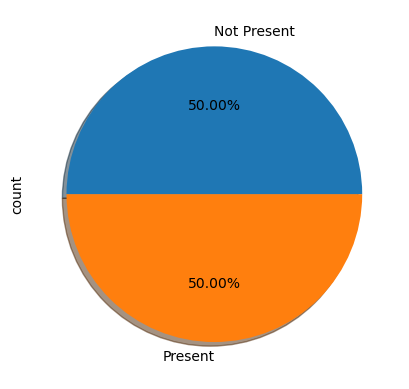

In [13]:
df["Virus Present"].value_counts().plot(kind = "pie", autopct = "%0.02f%%", shadow = True, labels = ["Not Present", "Present"])
plt.show()

**Med_1_mL**

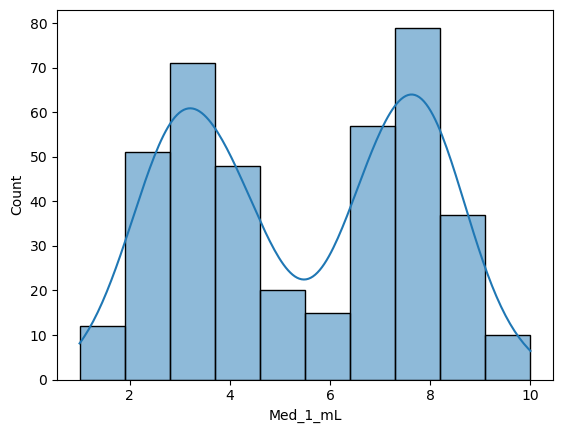

In [14]:
sns.histplot(df["Med_1_mL"], kde = True)
plt.show()

In [16]:
df.groupby("Virus Present")["Med_1_mL"].mean()

Virus Present
0    7.584185
1    3.311782
Name: Med_1_mL, dtype: float64

**Med_2_mL**

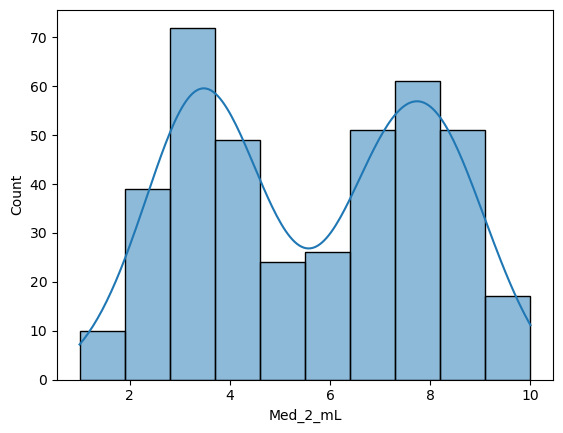

In [15]:
sns.histplot(df["Med_2_mL"], kde = True)
plt.show()

In [17]:
df.groupby("Virus Present")["Med_2_mL"].mean()

Virus Present
0    7.725771
1    3.507730
Name: Med_2_mL, dtype: float64

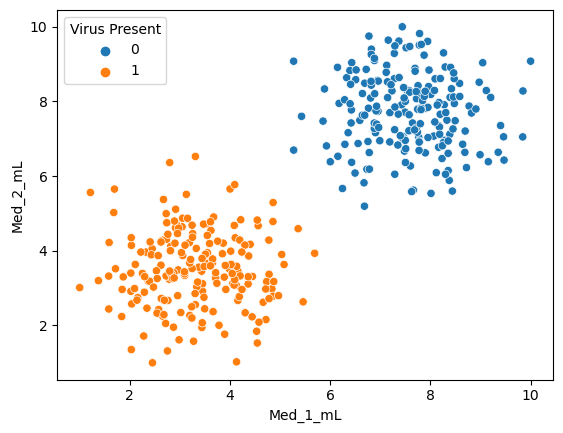

In [18]:
sns.scatterplot(x = df["Med_1_mL"], y = df["Med_2_mL"], hue = df["Virus Present"])
plt.show()

In [19]:
corr = df.corr()
corr

,Med_1_mL,Med_2_mL,Virus Present
Med_1_mL,1.000000,0.828090,-0.922304
Med_2_mL,0.828090,1.000000,-0.903718
Virus Present,-0.922304,-0.903718,1.000000


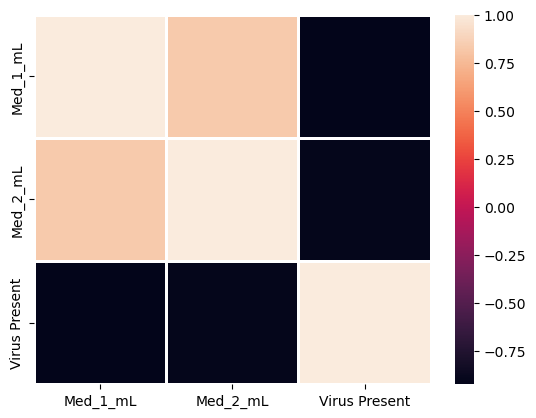

In [21]:
sns.heatmap(corr, linewidth = 1)
plt.show()

## **Data Wrangling**

**Feature Transformation**

In [22]:
df.skew()

Med_1_mL        -0.011422
Med_2_mL         0.004315
Virus Present    0.000000
dtype: float64

- Normal Distributed, No Feature Transformation required.
- No encoding required due to absense of categorical variable.
- No scaling required.